In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math

In [2]:
!pip install yfinance

In [3]:
start_date = dt.datetime(2020,4,1)
end_date = dt.datetime(2023,4,1)

data = yf.download('GOOGL',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-04-01 to 2023-03-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   756 non-null    float64
 1   (High, GOOGL)    756 non-null    float64
 2   (Low, GOOGL)     756 non-null    float64
 3   (Open, GOOGL)    756 non-null    float64
 4   (Volume, GOOGL)  756 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.4 KB


In [5]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2020-04-01,54.905960,56.267027,54.477015,55.997006,51970000
2020-04-02,55.649769,55.935731,54.459085,54.801343,56410000
2020-04-03,54.437656,55.737445,53.559842,55.534183,51374000
2020-04-06,58.945820,59.322453,56.046829,56.445385,63320000
2020-04-07,58.914429,60.818529,58.649889,60.630707,61620000


Text(0, 0.5, 'Open')

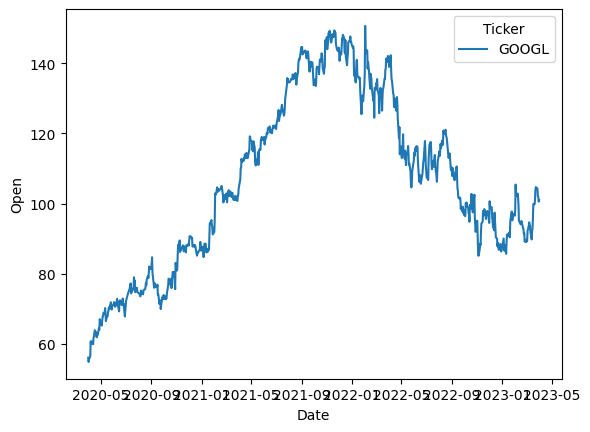

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data['Open'])
plt.ylabel('Open')

In [7]:
training_data_len = math.ceil(len(data)*0.8)
training_data_len

605

In [8]:
train_data = data[:training_data_len].iloc[:,-2]
test_data = data[training_data_len:].iloc[:,-2]
print(train_data.shape)
print(test_data.shape)

(605,)
(151,)


In [9]:
data[:training_data_len].iloc[:,-2]

,Open
,GOOGL
Date,
2020-04-01,55.997006
2020-04-02,54.801343
2020-04-03,55.534183
2020-04-06,56.445385
2020-04-07,60.630707
...,...
2022-08-18,118.998629
2022-08-19,118.629953


In [10]:
dataset_train = train_data

dataset_train = np.reshape(train_data,(-1,1))
print(dataset_train.shape)
#dataset_test = test_data.values.reshape(-1,1)


dataset_test = test_data

dataset_test = np.reshape(test_data,(-1,1))
print(dataset_test.shape)
#dataset_test = test_data.values.reshape(-1,1)

(605, 1)
(151, 1)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset_train)
print(scaled_data[:5])

[[0.01246751]
 [0.        ]
 [0.00764153]
 [0.01714288]
 [0.06078438]]


In [12]:
X_train = []
y_train = []

for i in range(50,len(scaled_data)):
    X_train.append(scaled_data[i-50:i,0])
    y_train.append(scaled_data[i,0])


In [13]:
len(scaled_data)

605

In [14]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))


In [16]:
scaled_test_data = scaler.transform(dataset_test)

# Create test sequences
X_test = []
y_test = []

for i in range(50, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-50:i, 0])
    y_test.append(scaled_test_data[i, 0])

# Convert to numpy arrays and reshape
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (101, 50, 1)
y_test shape: (101, 1)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Dropout, GRU, Bidirectional

model = Sequential()
model.add(SimpleRNN(50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation='tanh', return_sequences=True))
model.add(SimpleRNN(50, activation='tanh', return_sequences=True))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mean_absolute_error'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 0.1283 - mean_absolute_error: 0.2693 - val_loss: 0.0058 - val_mean_absolute_error: 0.0614
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0275 - mean_absolute_error: 0.1301 - val_loss: 0.0038 - val_mean_absolute_error: 0.0521
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0167 - mean_absolute_error: 0.1023 - val_loss: 0.0056 - val_mean_absolute_error: 0.0610
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0147 - mean_absolute_error: 0.0955 - val_loss: 0.0068 - val_mean_absolute_error: 0.0670
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0119 - mean_absolute_error: 0.0855 - val_loss: 0.0034 - val_mean_absolute_error: 0.0495
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0120 - mean_absolute_error: 0.0891 - val_loss: 0.0038 - val_mean_absolute_error: 0.0517
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0099 - mean_absolute_error: 0.0799 - val_los

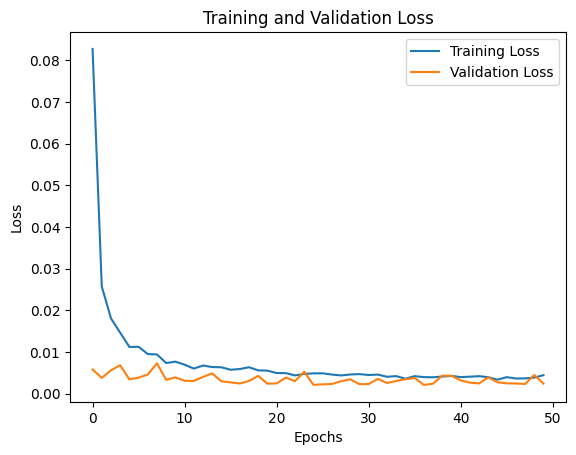

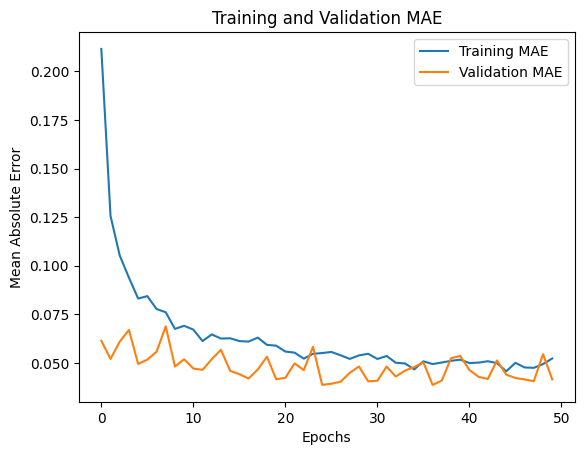

In [20]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation MAE
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()



In [21]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test Mean Absolute Error: {test_mae:.4f}")


Test Loss (MSE): 0.0024
Test Mean Absolute Error: 0.0415
